In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('Suicides in India 2001-2012.csv')

### 1.Basic Analysis of the Data

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
#Total size of the dataframe(total number of entries)
df.size

1662633

In [5]:
df.shape#(row,column)

(237519, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
#check for null values..
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

<AxesSubplot:>

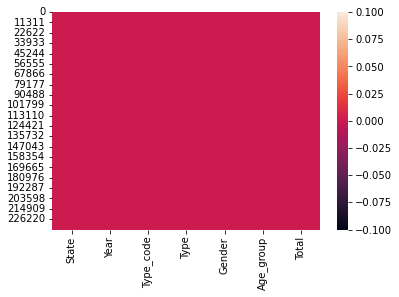

In [8]:
sns.heatmap(df.isnull())

In [9]:
# We do not have any missing values in our dataset.

In [10]:
#check for duplicate values.
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
237514    False
237515    False
237516    False
237517    False
237518    False
Length: 237519, dtype: bool

In [11]:
df[df.duplicated()]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [12]:
#No duplicate value is present in our dataset.

In [13]:
df.head(2)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0


In [14]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [15]:
df['Year'].value_counts()

2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2003    19786
2006    19786
2009    19786
2004    19783
Name: Year, dtype: int64

In [16]:
df['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [17]:
df['Type'].value_counts()

Others (Please Specify)                           7263
Illness (Aids/STD)                                4200
By Drowning                                       4200
By touching electric wires                        4200
By Machine                                        4200
                                                  ... 
Graduate                                           912
Middle                                             912
Bankruptcy or Sudden change in Economic Status     350
Not having Children (Barrenness/Impotency          350
By Other means                                     350
Name: Type, Length: 69, dtype: int64

In [18]:
df['Gender'].value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

In [19]:
df['Age_group'].value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

### 2. Feature Engineering and Data cleaning.

In [20]:
#Age limit 0-100+ was not making sense that is why we have updated the age range to 61-100+
df['Age_group'].replace({'0-100+':'61-100+'},inplace=True)

In [21]:
df['Age_group'].value_counts()

15-29      45223
30-44      45193
45-59      45146
60+        45074
0-14       45027
61-100+    11856
Name: Age_group, dtype: int64

In [22]:
#We have removed some rows where States were not relatable. We can analyze it later.
ndf=df[~(df['State'].isin(['Total (All India)','Total (States)','Total (Uts)']))]

In [23]:
extra_df=df[(df['State'].isin(['Total (All India)','Total (States)','Total (Uts)']))]

In [24]:
ndf['Type'].value_counts().index

Index(['Others (Please Specify)', 'Illness (Aids/STD)', 'By Drowning',
       'By touching electric wires', 'By Machine', 'By Fire/Self Immolation',
       'By Jumping off Moving Vehicles/Trains', 'By Self Infliction of injury',
       'By Over Alcoholism', 'By Consuming Other Poison',
       'By coming under running vehicles/trains',
       'By Overdose of sleeping pills', 'By Jumping from (Building)',
       'By Fire-Arms', 'By Hanging', 'Retired Person', 'Unemployed',
       'Public Sector Undertaking', 'Service (Private)', 'House Wife',
       'Self-employed (Business activity)', 'Professional Activity', 'Student',
       'Farming/Agriculture Activity', 'Service (Government)',
       'By Jumping from (Other sites)', 'By Consuming Insecticides',
       'Professional/Career Problem', 'Dowry Dispute',
       'Ideological Causes/Hero Worshipping', 'Other Prolonged Illness',
       'Property Dispute', 'Fall in Social Reputation',
       'Illegitimate Pregnancy', 'Failure in Examination'

In [25]:
ndf['Type'].replace({
    'Others (Please Specify)':'By Other means',
    'Causes Not known':'By Other means',
    'Other Causes (Please Specity)':'By Other means',
    'By Other means (please specify)':'By Other means',    
    'By Fire/Self Immolation':'By Self Infliction of injury',
    'By Jumping from (Other sites)': 'By Jumping off Moving Vehicles/Trains',
    'Unemployed':'Unemployment',
    'Not having Children(Barrenness/Impotency':'Barrenn/Impotent',
     'Not having Children (Barrenness/Impotency':'Barrenn/Impotent',
    'Bankruptcy or Sudden change in Economic Status':'Bankruptcy',
    'Bankruptcy or Sudden change in Economic':'Bankruptcy'
},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
ndf['Type'].value_counts()

By Other means                              19863
By Self Infliction of injury                 8400
Unemployment                                 8400
By Jumping off Moving Vehicles/Trains        8400
Illness (Aids/STD)                           4200
Bankruptcy                                   4200
Farming/Agriculture Activity                 4200
Student                                      4200
By Consuming Insecticides                    4200
By Hanging                                   4200
By touching electric wires                   4200
By Machine                                   4200
By Over Alcoholism                           4200
Professional Activity                        4200
By Consuming Other Poison                    4200
By coming under running vehicles/trains      4200
By Overdose of sleeping pills                4200
By Jumping from (Building)                   4200
By Drowning                                  4200
By Fire-Arms                                 4200


In [27]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [28]:
causes_df=ndf[ndf['Type_code']=='Causes']
edu_df=ndf[ndf['Type_code']=='Education_Status']
adoped_df=ndf[ndf['Type_code']=='Means_adopted']
professional_df=ndf[ndf['Type_code']=='Professional_Profile']
social_df=ndf[ndf['Type_code']=='Social_Status']

In [29]:
ndf.to_csv('suicide.csv',index=False)

### 3. EDA

In [30]:
df.head(2)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0


<AxesSubplot:xlabel='State'>

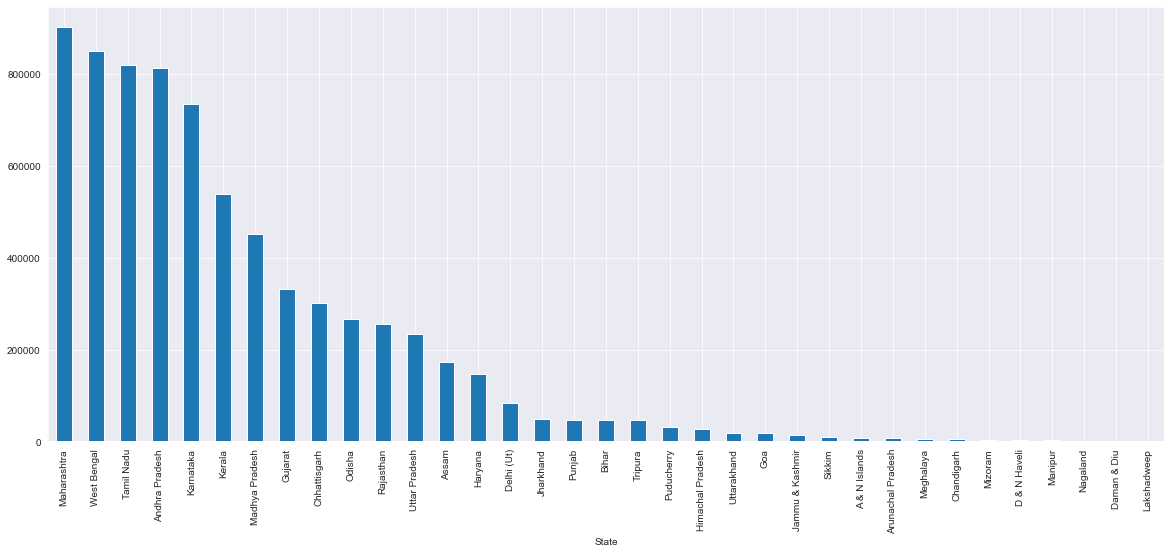

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
ndf.groupby(by=['State']).sum()['Total'].sort_values(ascending=False).plot(kind='bar')

In [32]:
ndf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


<AxesSubplot:xlabel='State'>

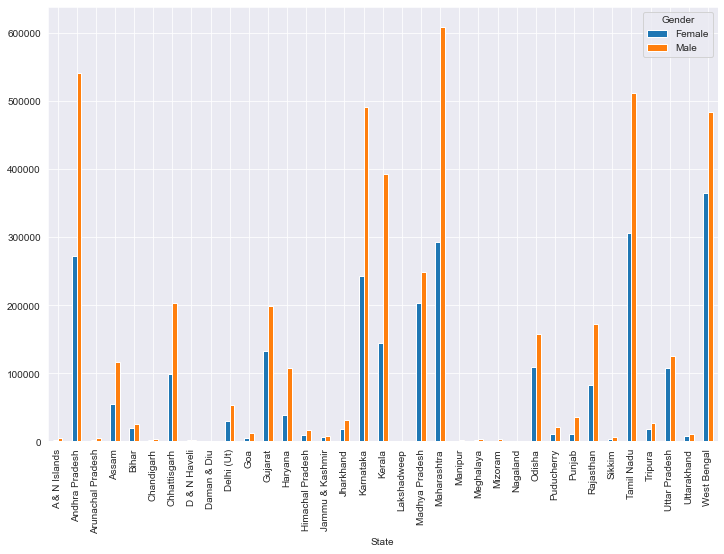

In [33]:
ndf.groupby(['State','Gender']).sum()['Total'].unstack().plot(kind='bar',figsize=(12,8))

<AxesSubplot:xlabel='Type'>

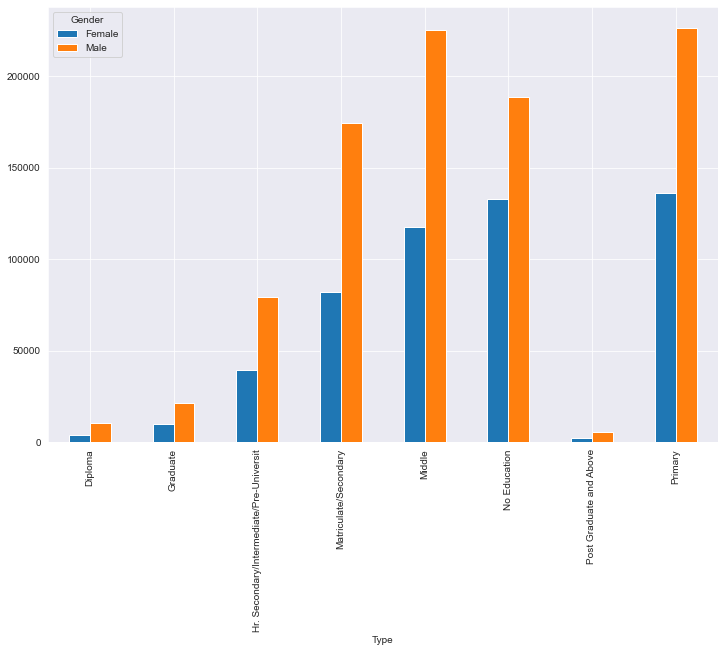

In [34]:
edu_df.groupby(['Type','Gender']).sum()['Total'].unstack().plot(kind='bar',figsize=(12,8))

<AxesSubplot:xlabel='Gender'>

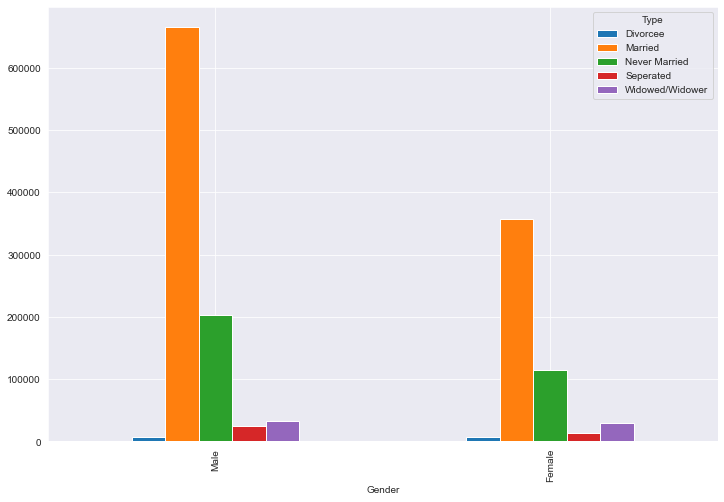

In [35]:
social_df.groupby(['Gender','Type']).sum()['Total'].unstack().sort_values(by='Gender',ascending=False).plot(kind='bar',figsize=(12,8))


<AxesSubplot:xlabel='Type'>

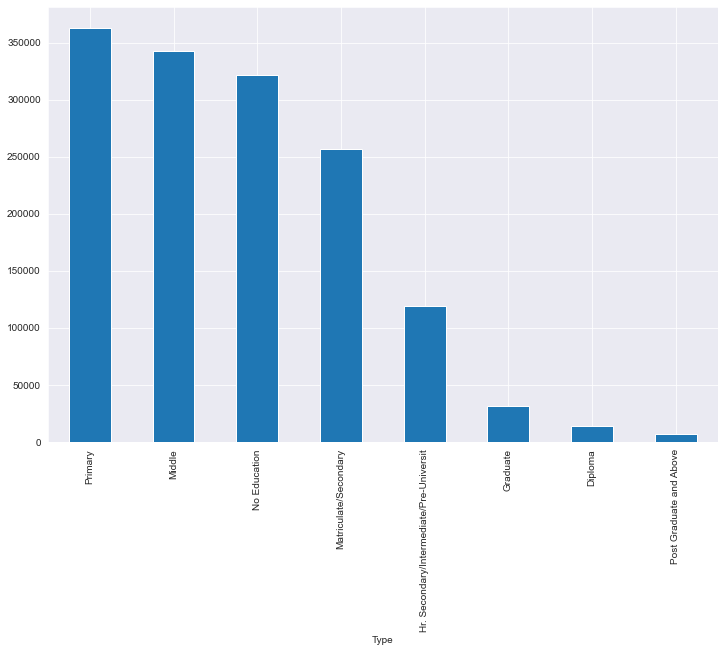

In [36]:
plt.figure(figsize=(12,8))
edu_df.groupby(by='Type').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Type'>

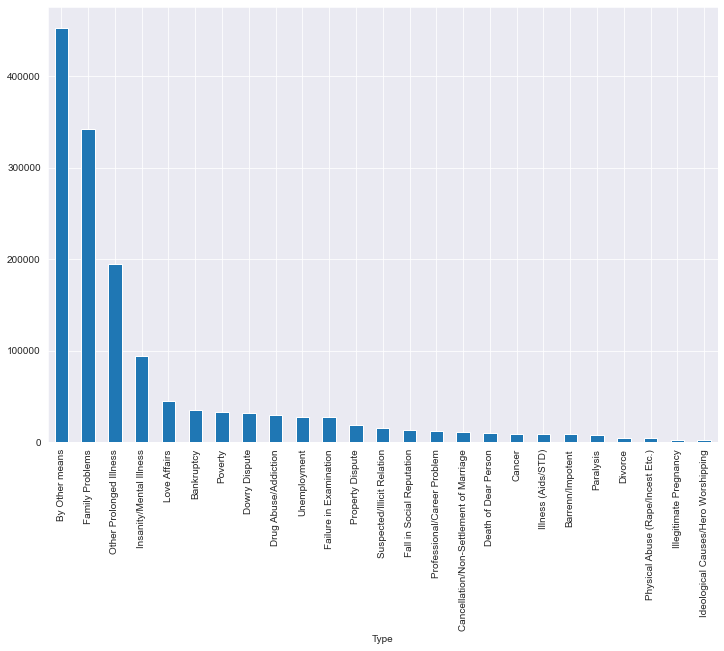

In [37]:
plt.figure(figsize=(12,8))
causes_df.groupby(by='Type').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Type'>

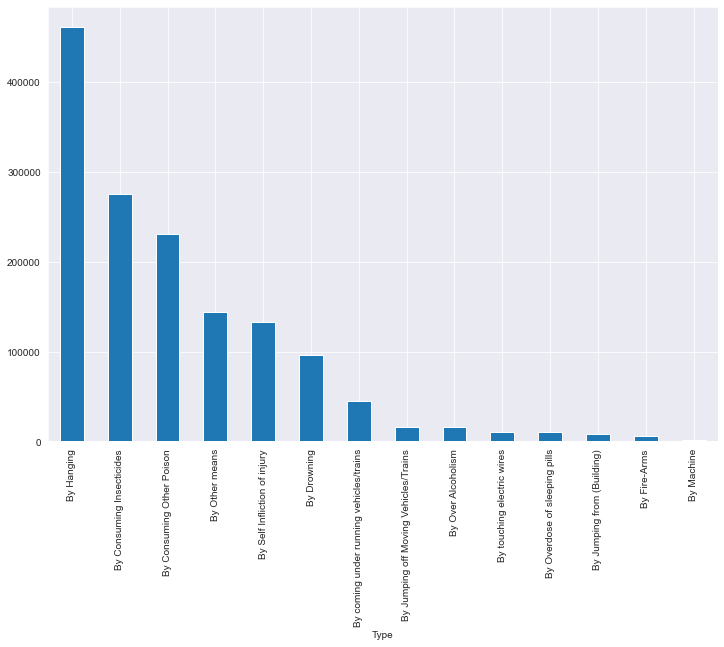

In [38]:
plt.figure(figsize=(12,8))
adoped_df.groupby(by='Type').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Type'>

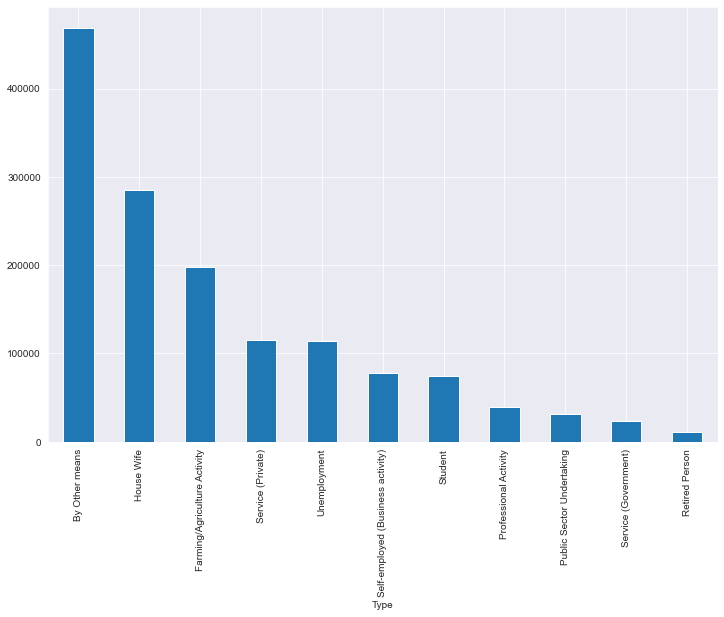

In [39]:
plt.figure(figsize=(12,8))
professional_df.groupby(by='Type').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Type'>

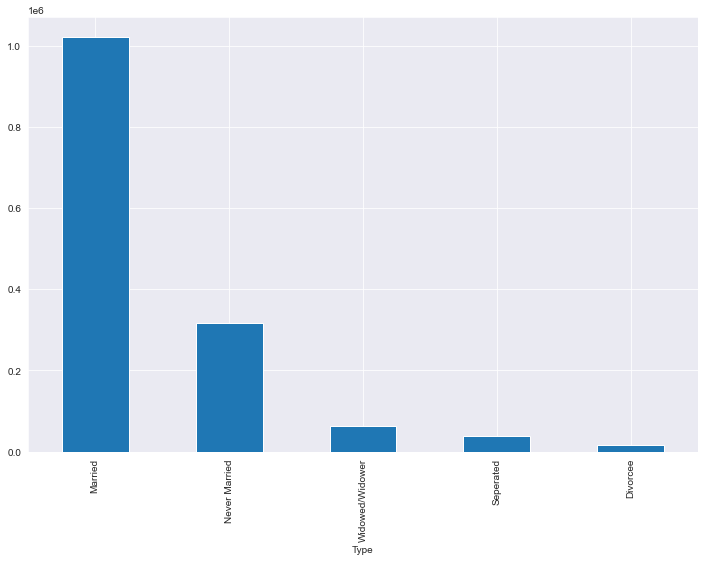

In [40]:
plt.figure(figsize=(12,8))
social_df.groupby(by='Type').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

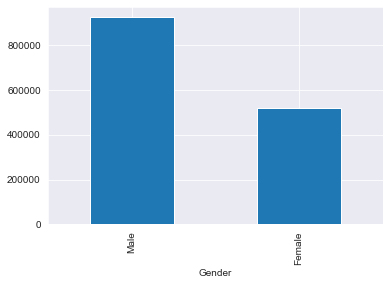

In [41]:
causes_df.groupby('Gender').sum()['Total'].sort_values(ascending=False).plot(kind='bar')

In [42]:
ndf['Age_group'].value_counts()

15-29      45223
30-44      45193
45-59      45146
60+        45074
0-14       45027
61-100+    10920
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group'>

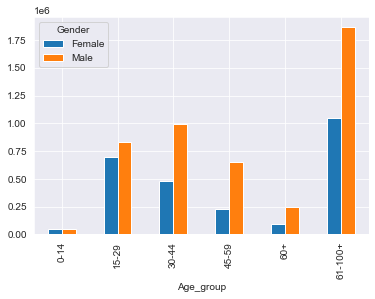

In [43]:
ndf.groupby(by=['Age_group','Gender']).sum()['Total'].unstack().plot(kind='bar')

In [44]:
ndf.groupby(by='Gender').sum()['Total']

Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64

In [45]:
ndf.groupby(by=['State']).sum()['Total'].sort_values(ascending=False)[:5]

State
Maharashtra       901945
West Bengal       849936
Tamil Nadu        818691
Andhra Pradesh    814059
Karnataka         734825
Name: Total, dtype: int64

In [46]:
#These are the top 5 states where the number of suicide is highest.

In [47]:
#Let's check and analyze west bengal's data only..

In [48]:
wb_data=ndf[ndf['State']=='West Bengal']

In [49]:
wb_data.groupby('Year').sum()['Total'].sort_values(ascending=False)

Year
2011    82460
2010    80185
2006    78625
2005    75075
2007    74300
2008    74260
2009    73240
2001    68450
2004    67035
2003    66400
2002    65035
2012    44871
Name: Total, dtype: int64

In [50]:
# In the year of 2011 highest number of people commited suicide in west bengal..
# Let's analyze the data of 2011..

In [51]:
wb_11_data=wb_data[wb_data['Year']==2011]

<AxesSubplot:xlabel='Gender'>

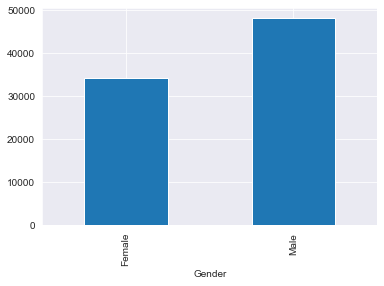

In [52]:
wb_11_data.groupby(by='Gender').sum()['Total'].plot(kind='bar')
## In this year the number of male suicides is higher than women suicide..

In [53]:
wb_11_data.groupby(['Type']).sum()['Total'].sort_values(ascending=False)

Type
By Other means                              18176
Married                                     10487
By Hanging                                   5457
Primary                                      5440
Middle                                       4755
Never Married                                4691
By Consuming Other Poison                    3326
Family Problems                              3047
House Wife                                   2955
Matriculate/Secondary                        2443
No Education                                 2389
Unemployment                                 2084
By Consuming Insecticides                    1628
Insanity/Mental Illness                      1298
Self-employed (Business activity)            1156
Hr. Secondary/Intermediate/Pre-Universit     1075
Student                                      1034
Love Affairs                                  941
Dowry Dispute                                 930
Farming/Agriculture Activity                 

In [54]:
ndf.groupby(by=['Type']).sum()['Total'].sort_values(ascending=False)

Type
By Other means                              1066636
Married                                     1021774
By Hanging                                   460955
Primary                                      362827
Middle                                       342971
Family Problems                              341952
No Education                                 321757
Never Married                                318301
House Wife                                   285243
By Consuming Insecticides                    275501
Matriculate/Secondary                        256566
By Consuming Other Poison                    231178
Farming/Agriculture Activity                 197923
Other Prolonged Illness                      194565
Unemployment                                 141739
By Self Infliction of injury                 133099
Hr. Secondary/Intermediate/Pre-Universit     118908
Service (Private)                            115472
By Drowning                                   96711
Insanit

In [55]:
ndf[ndf['State']=='Maharashtra'].groupby(by='Type').sum()['Total'].sort_values(ascending=False)

Type
Married                                     134843
Family Problems                              65341
By Hanging                                   61651
By Consuming Insecticides                    55773
Primary                                      48474
Middle                                       47927
By Other means                               46334
Farming/Agriculture Activity                 44769
House Wife                                   42059
Matriculate/Secondary                        41304
Never Married                                37539
Other Prolonged Illness                      33808
No Education                                 27088
By Self Infliction of injury                 22966
Service (Private)                            19754
By Drowning                                  18923
Unemployment                                 15882
Insanity/Mental Illness                      14859
By Consuming Other Poison                    13248
Drug Abuse/Addiction      

### Need detailed study...